### Taller de Automatización de Procesos con Python
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/papaya_bromatologicos.csv")

In [3]:
# estructura
df.head()

,Muestra,Humedad %,Azucares %,Extracto etereo %,Fibra %,Proteína %,Ceniza %
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


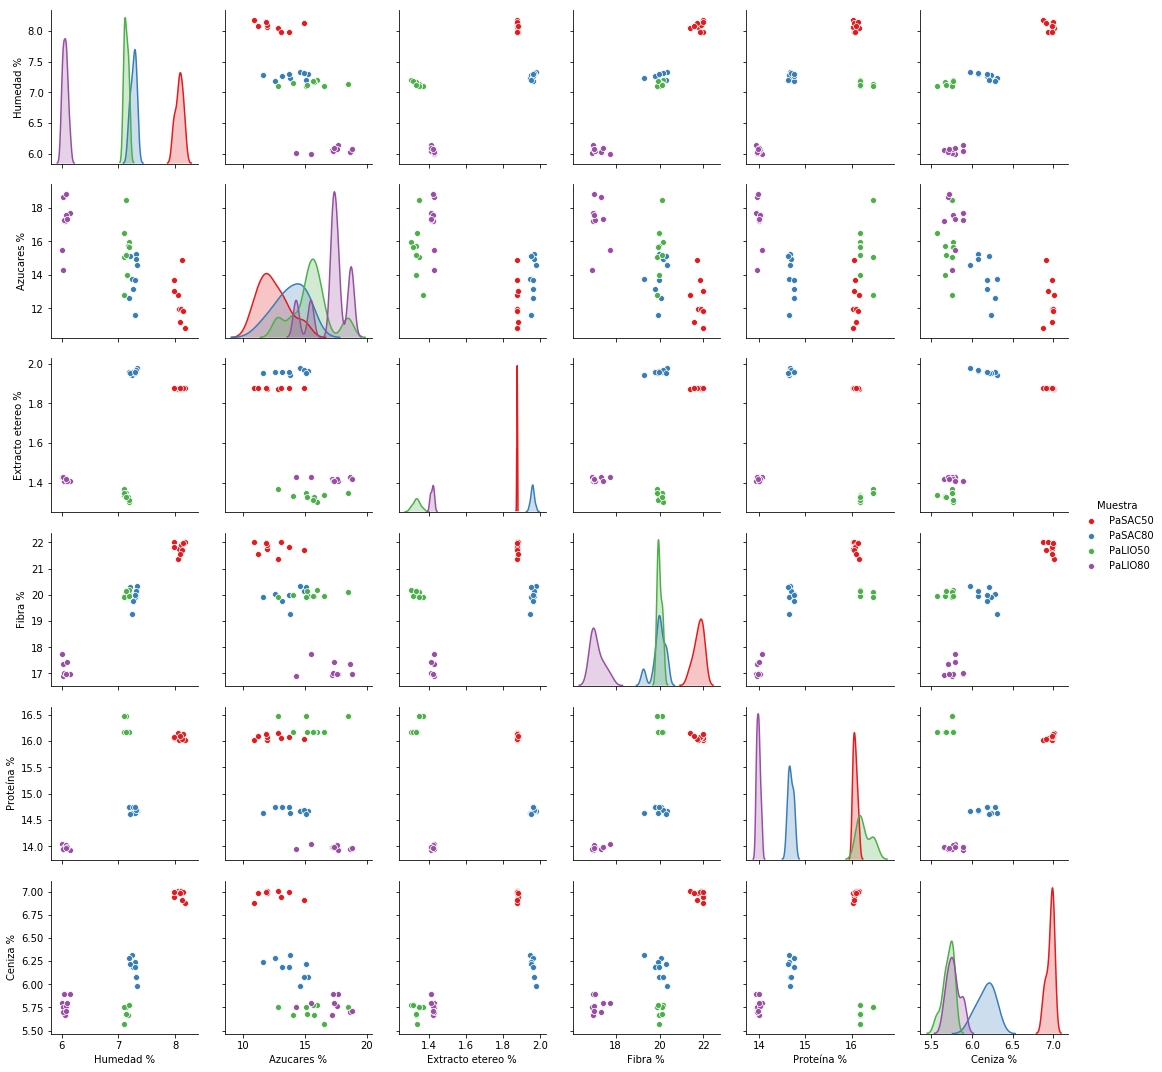

In [4]:
sns.pairplot(df,hue='Muestra',palette='Set1')

In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Muestra',axis=1)
y = df['Muestra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         2
    PaLIO80       1.00      1.00      1.00         2
    PaSAC50       1.00      1.00      1.00         3
    PaSAC80       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        11



In [9]:
print(confusion_matrix(y_test,predictions))

[[2 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [10]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Humedad %',
 'Azucares %',
 'Extracto etereo %',
 'Fibra %',
 'Proteína %',
 'Ceniza %']

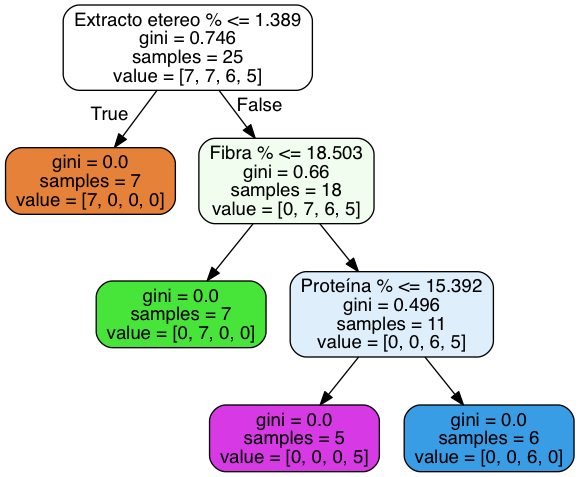

In [11]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [13]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[2 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [15]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         2
    PaLIO80       1.00      1.00      1.00         2
    PaSAC50       1.00      1.00      1.00         3
    PaSAC80       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        11



In [18]:
# PCA
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop("Muestra", axis=1)

,Humedad %,Azucares %,Extracto etereo %,Fibra %,Proteína %,Ceniza %
0,8.171828,10.844601,1.875403,22.001089,16.0300,6.879787
1,8.047318,12.782585,1.872500,21.374351,16.1560,7.010996
2,7.983207,13.015447,1.877934,22.001089,16.0560,6.940326
3,8.071828,11.947515,1.876403,21.743508,16.0300,6.979787
4,8.097318,11.933919,1.873500,21.901089,16.0860,7.000996
5,7.983207,13.662424,1.876934,21.843508,16.0760,6.990326
6,8.121828,14.887668,1.875403,21.701089,16.0400,6.909787
7,8.147318,11.850996,1.875500,21.991089,16.1260,6.996335
8,8.083207,11.167006,1.877934,21.574351,16.0960,6.983259
9,7.334711,14.590271,1.976403,20.350833,14.6750,5.981738


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_data = scaler.transform(X)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
x_pca = pca.transform(scaled_data)

In [34]:
scaled_data.shape

(36, 6)

In [35]:
x_pca.shape

(36, 2)

In [40]:
X.head()

,Humedad %,Azucares %,Extracto etereo %,Fibra %,Proteína %,Ceniza %
0,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [50]:
def generar_indice(elemento):
    if elemento == "PaSAC50":
        return 1
    if elemento == "PaSAC80":
        return 2
    if elemento == "PaLIO50":
        return 3
    if elemento == "PaLIO80":
        return 4

In [52]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

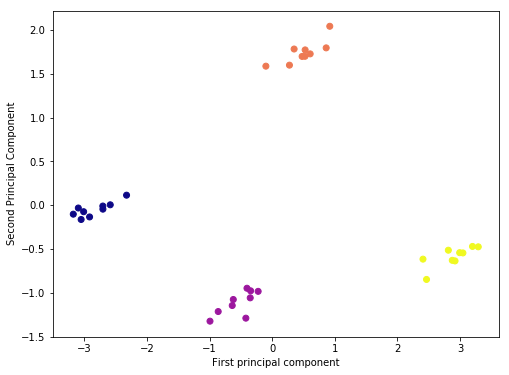

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [54]:
# interpreting the components
pca.components_

array([[-0.47127516,  0.413324  , -0.34569398, -0.46058078, -0.31511255,
        -0.41967616],
       [ 0.13324879,  0.14738689, -0.60036773,  0.21187538,  0.69628881,
        -0.26527565]])

In [55]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

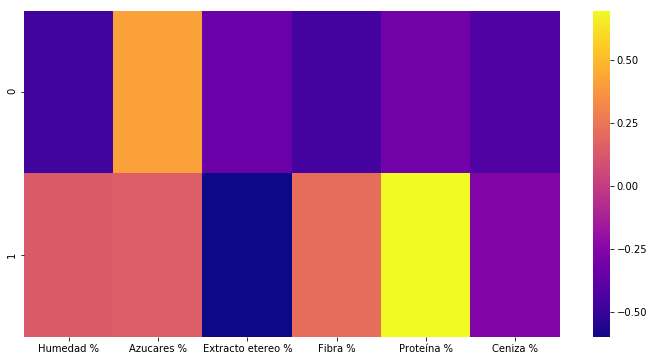

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [61]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [ ]:
# using KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [63]:
pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test,pred))

[[3 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 2]]


In [66]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [68]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

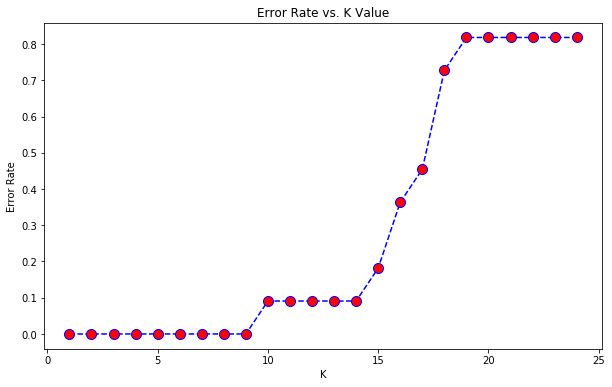

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[3 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 2]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [71]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 0 3 0]
 [1 0 3 0]
 [0 0 2 0]
 [0 0 2 0]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         4
          3       0.20      1.00      0.33         2
          4       0.00      0.00      0.00         2

avg / total       0.04      0.18      0.06        11



/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [38]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [21]:
# converting categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
Muestra              36 non-null object
Humedad %            36 non-null float64
Azucares %           36 non-null float64
Extracto etereo %    36 non-null float64
Fibra %              36 non-null float64
Proteína %           36 non-null float64
Ceniza %             36 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


In [22]:
muestra = pd.get_dummies(df['Muestra'],drop_first=True)

In [24]:
df.drop("Muestra", axis=1, inplace=True)

In [26]:
df = pd.concat([df, muestra], axis=1)

In [27]:
df.head()

,Humedad %,Azucares %,Extracto etereo %,Fibra %,Proteína %,Ceniza %,PaLIO80,PaSAC50,PaSAC80
0,8.171828,10.844601,1.875403,22.001089,16.030,6.879787,0,1,0
1,8.047318,12.782585,1.872500,21.374351,16.156,7.010996,0,1,0
2,7.983207,13.015447,1.877934,22.001089,16.056,6.940326,0,1,0
3,8.071828,11.947515,1.876403,21.743508,16.030,6.979787,0,1,0
4,8.097318,11.933919,1.873500,21.901089,16.086,7.000996,0,1,0


In [59]:
# K Nearest Neighbors

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [ ]:
# Building a Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#improt the data
X = pd.read_csv("data/papaya_bromatologicos.csv")
y = X.pop("Muestra")

In [ ]:
# estructura del df
X.describe()

In [ ]:
# get just the numeric variables by selecting only the variables that are not "object" datatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

In [ ]:
# letś build our first model. I always have oob_score=True. It is a good idea to increase n_estimators
#  to a number higher than the defaul. in this case the oob_predictions will be based on a forest of 33 trees.
# I set random_state=42 so that you all could replicate the model exactly
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)